In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
x_train, y_train = train['features'], train['labels']
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [4]:
x_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
x_validation.shape

(4410, 32, 32, 3)

In [7]:
y_validation.shape

(4410,)

In [8]:
x_test.shape

(12630, 32, 32, 3)

In [9]:
y_test.shape

(12630,)

36

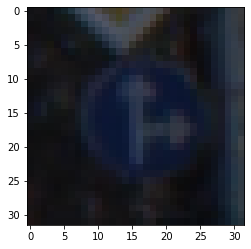

In [10]:
# Image Exploration

i = 1000
plt.imshow(x_train[i])
y_train[i]

23

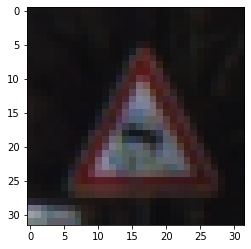

In [11]:
i = 2048
plt.imshow(x_train[i])
y_train[i]

7

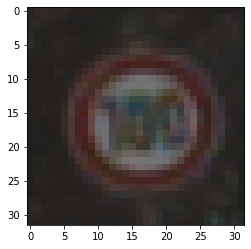

In [12]:
i = 25004
plt.imshow(x_train[i])
y_train[i]

2

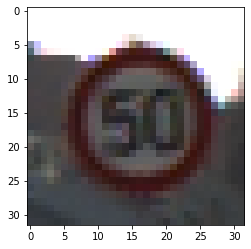

In [13]:
i = 33041
plt.imshow(x_train[i])
y_train[i]

41

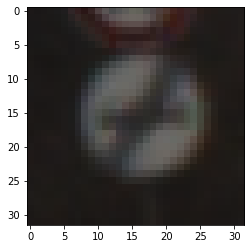

In [14]:
i = 1
plt.imshow(x_train[i])
y_train[i]

8

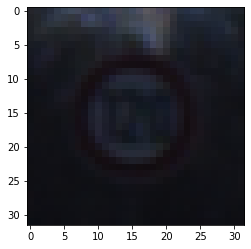

In [15]:
i = 2048
plt.imshow(x_validation[i])
y_validation[i]

1

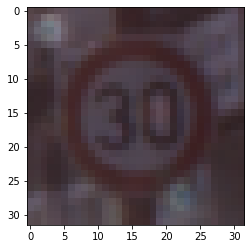

In [16]:
i = 350
plt.imshow(x_validation[i])
y_validation[i]

28

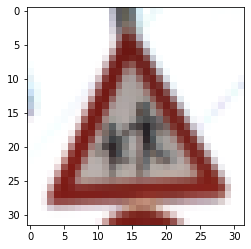

In [17]:
i = 3508
plt.imshow(x_validation[i])
y_validation[i]

33

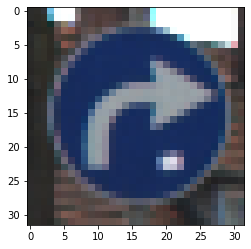

In [18]:
i = 480
plt.imshow(x_test[i])
y_test[i]

35

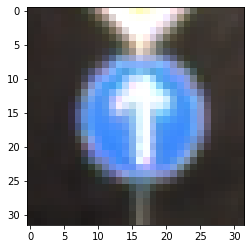

In [19]:
i = 1100
plt.imshow(x_test[i])
y_test[i]

In [20]:
# Data Preparation
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [21]:
x_train_gray = np.sum(x_train/3, axis = 3, keepdims = True)
x_test_gray = np.sum(x_test/3, axis = 3, keepdims = True)
x_validation_gray = np.sum(x_validation/3, axis = 3, keepdims = True)

In [22]:
x_train_gray.shape

(34799, 32, 32, 1)

In [23]:
x_test_gray.shape

(12630, 32, 32, 1)

In [24]:
x_validation_gray.shape

(4410, 32, 32, 1)

In [25]:
x_train_gray_norm = (x_train_gray - 128)/128
x_test_gray_norm = (x_test_gray - 128)/128
x_validation_gray_norm = (x_validation_gray - 128)/128

In [26]:
x_train_gray_norm

array([[[[-0.80729167],
         [-0.84114583],
         [-0.83854167],
         ...,
         [-0.84114583],
         [-0.6953125 ],
         [-0.61979167]],

        [[-0.796875  ],
         [-0.82552083],
         [-0.78385417],
         ...,
         [-0.81770833],
         [-0.65104167],
         [-0.61197917]],

        [[-0.78645833],
         [-0.79947917],
         [-0.71875   ],
         ...,
         [-0.796875  ],
         [-0.63541667],
         [-0.60677083]],

        ...,

        [[-0.90364583],
         [-0.85677083],
         [-0.7578125 ],
         ...,
         [-0.76041667],
         [-0.81770833],
         [-0.87760417]],

        [[-0.90364583],
         [-0.8671875 ],
         [-0.76302083],
         ...,
         [-0.7578125 ],
         [-0.80208333],
         [-0.87239583]],

        [[-0.890625  ],
         [-0.85677083],
         [-0.76822917],
         ...,
         [-0.78385417],
         [-0.828125  ],
         [-0.87239583]]],


       [[[-0.57291667],


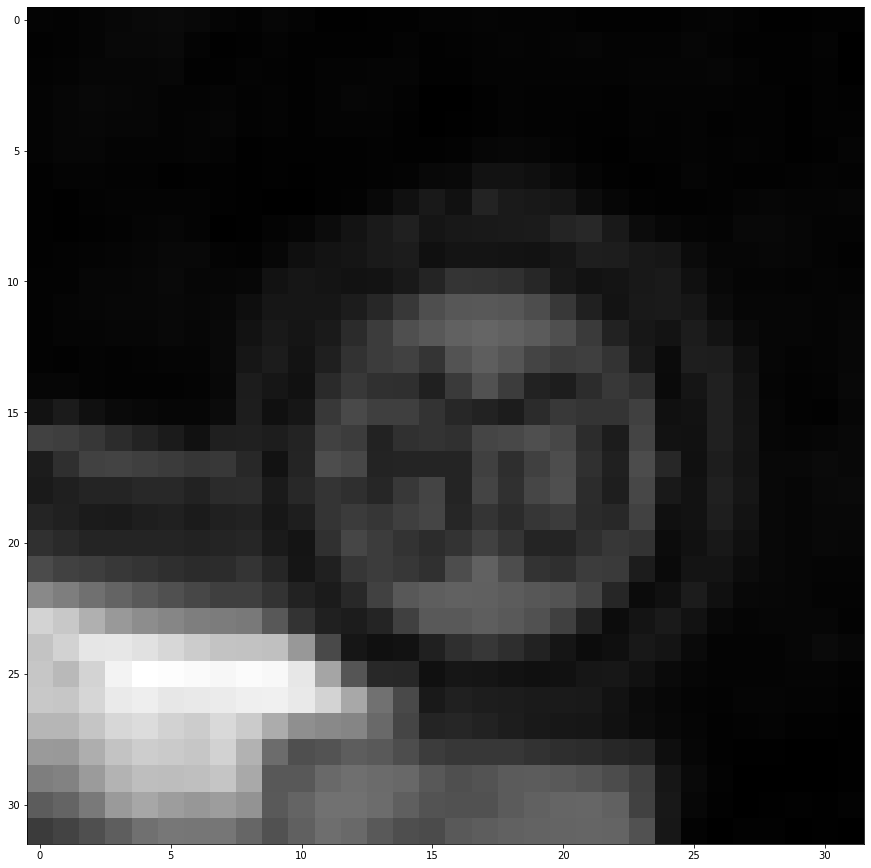

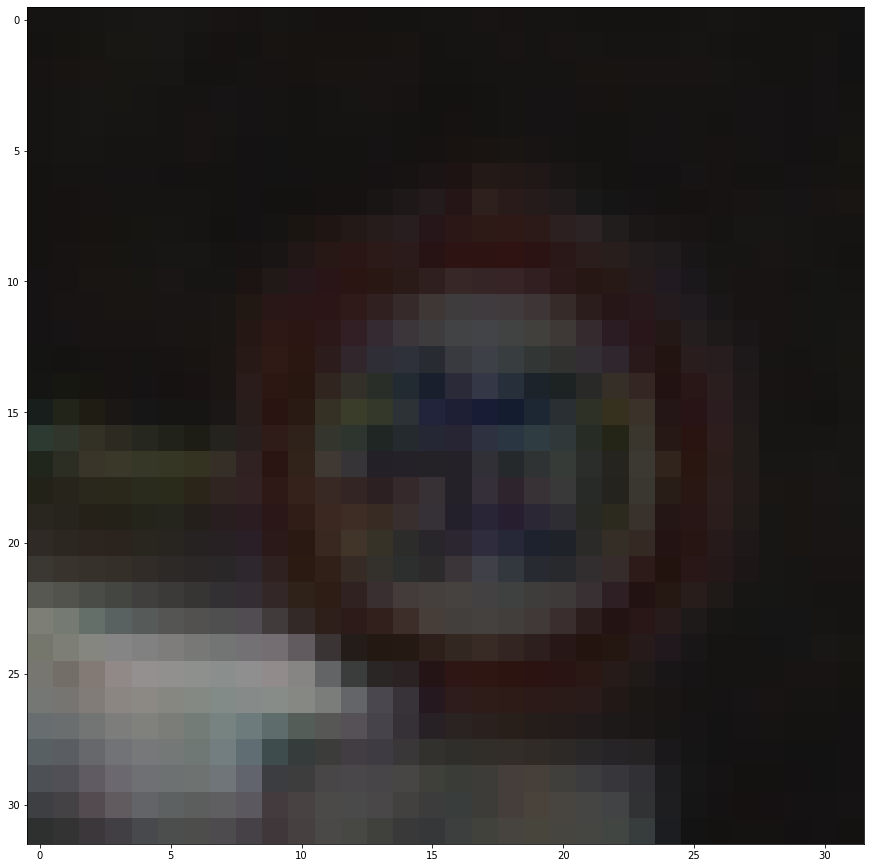

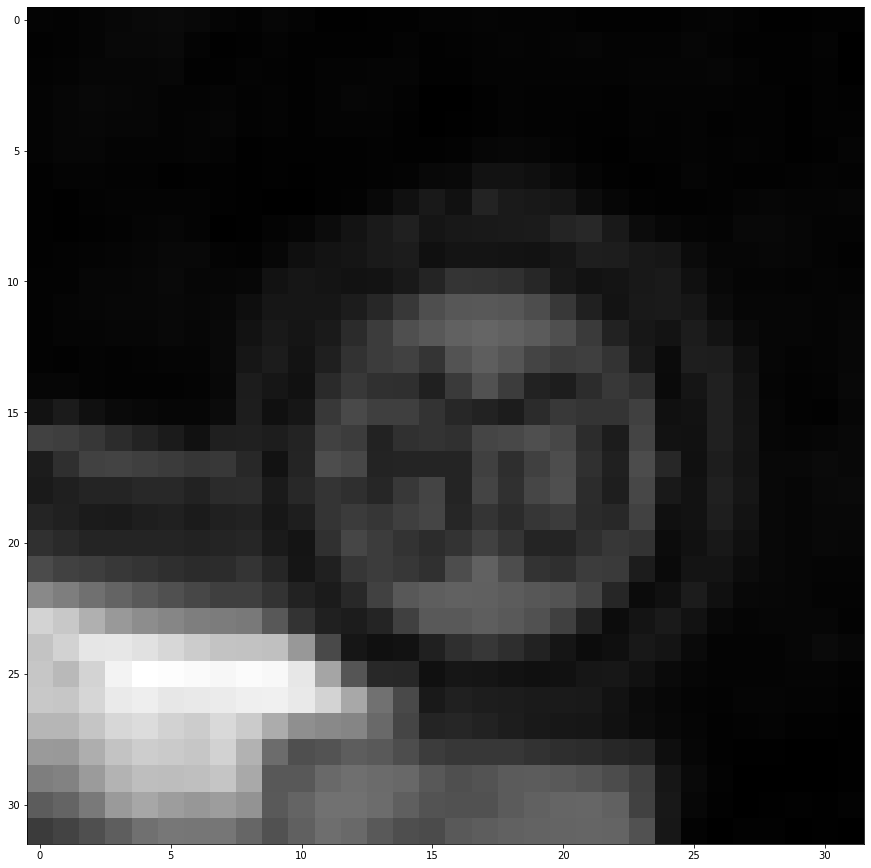

In [27]:
plt.figure(figsize = (15,20))
i = 610
plt.imshow(x_train_gray[i].squeeze(), cmap = 'gray')
plt.figure(figsize = (15,20))
plt.imshow(x_train[i])

plt.figure(figsize = (15,20))
plt.imshow(x_train_gray_norm[i].squeeze(), cmap = 'gray')

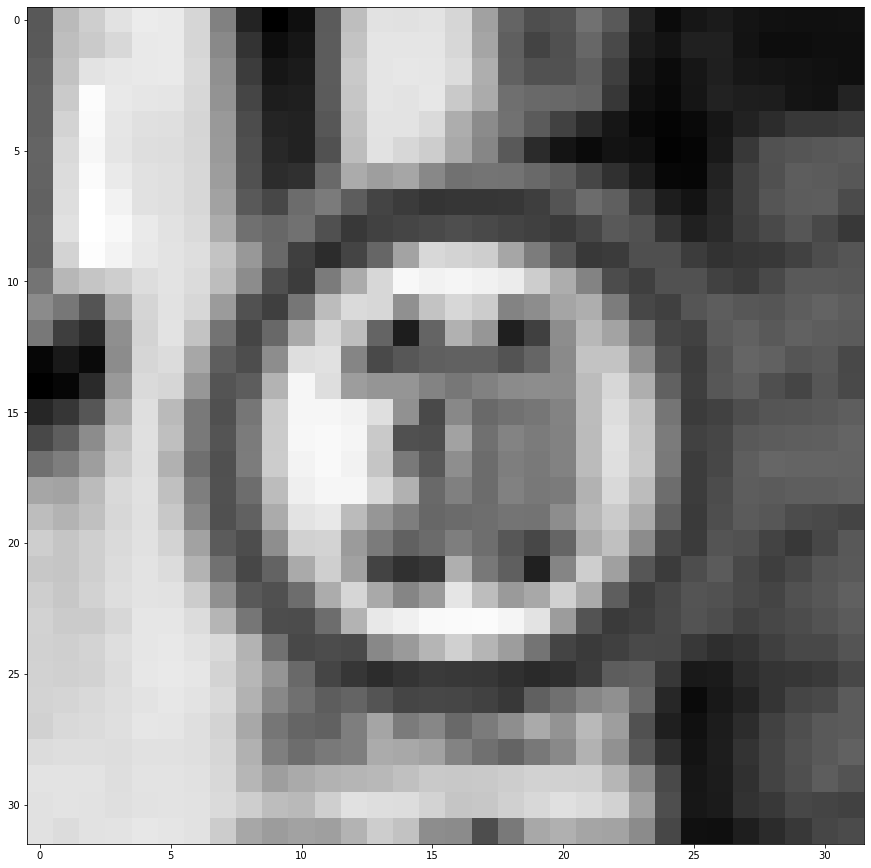

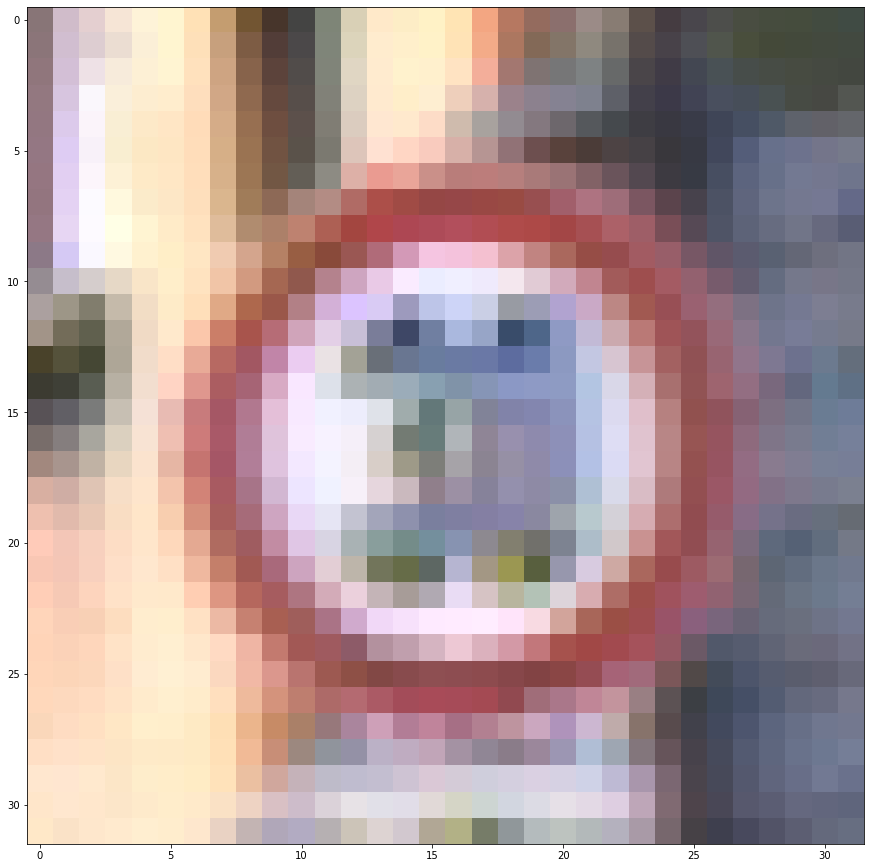

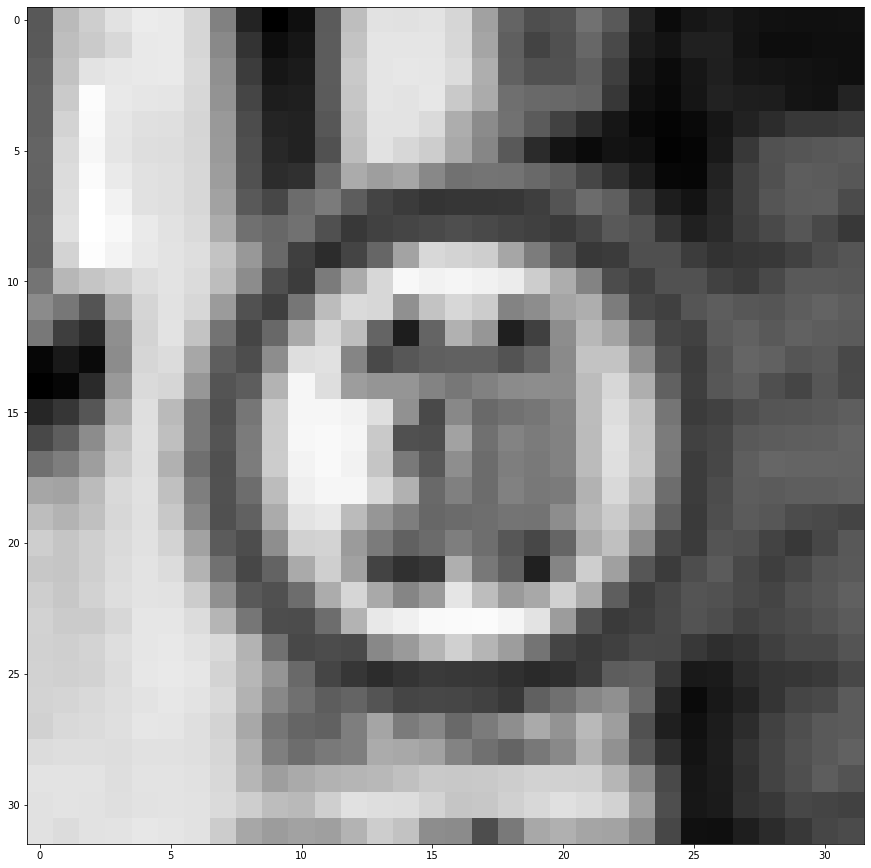

In [28]:
plt.figure(figsize = (15,20))
i = 100
plt.imshow(x_test_gray[i].squeeze(), cmap = 'gray')
plt.figure(figsize = (15,20))
plt.imshow(x_test[i])

plt.figure(figsize = (15,20))
plt.imshow(x_test_gray_norm[i].squeeze(), cmap = 'gray')

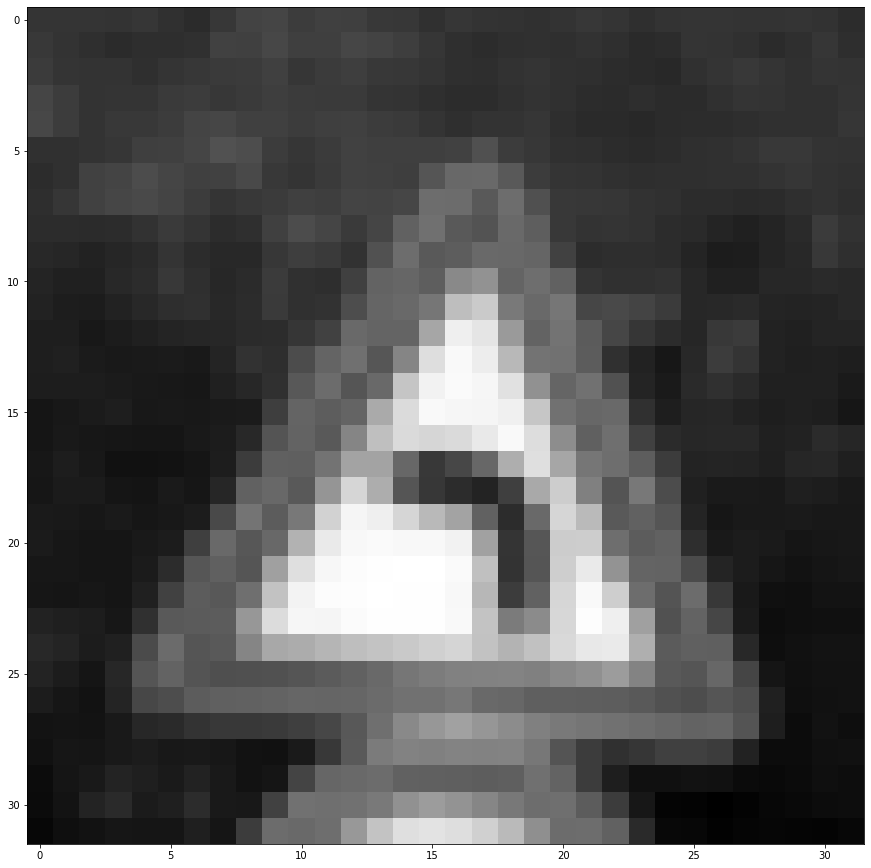

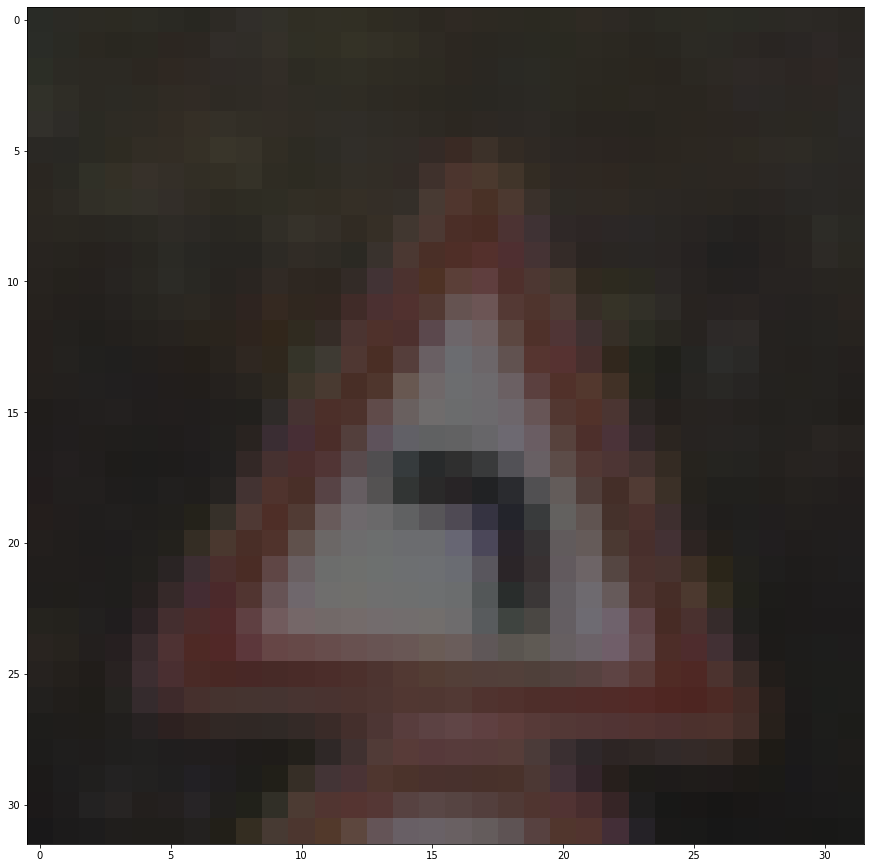

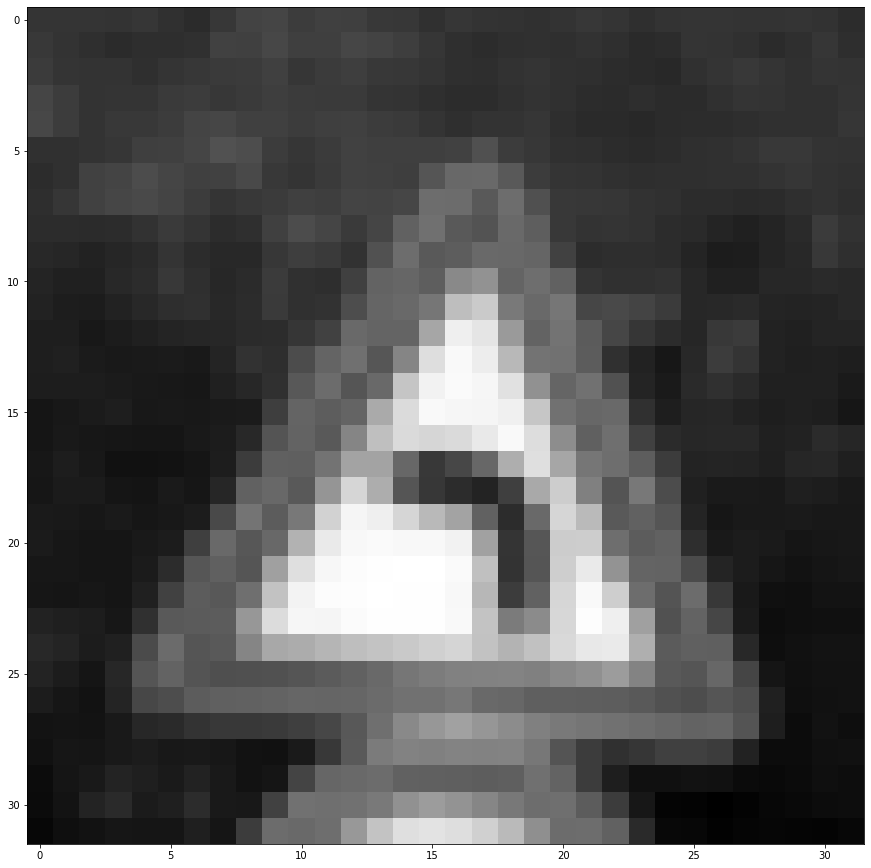

In [29]:
plt.figure(figsize = (15,20))
i = 910
plt.imshow(x_validation_gray[i].squeeze(), cmap = 'gray')
plt.figure(figsize = (15,20))
plt.imshow(x_validation[i])

plt.figure(figsize = (15,20))
plt.imshow(x_validation_gray_norm[i].squeeze(), cmap = 'gray')

In [30]:
# Model Training

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [31]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 6, kernel_size=(5,5), activation = 'relu', input_shape = (32,32,1)))
cnn_model.add(AveragePooling2D())


cnn_model.add(Conv2D(filters = 16, kernel_size=(5,5), activation = 'relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120, activation = 'relu'))
cnn_model.add(Dense(units = 84, activation = 'relu'))
cnn_model.add(Dense(units = 43, activation = 'softmax'))

In [32]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer = Adam(lr = 0.0001), metrics = ['accuracy'] )

In [33]:
history = cnn_model.fit(x_train_gray_norm, 
              y_train, 
              batch_size = 500, 
              epochs = 20, 
              verbose = 1, 
              validation_data = (x_validation_gray_norm, y_validation))

Epoch 1/20
70/70 [==============================] - 10s 137ms/step - loss: 3.6716 - accuracy: 0.0445 - val_loss: 3.5894 - val_accuracy: 0.0832
Epoch 2/20
70/70 [==============================] - 9s 130ms/step - loss: 3.4082 - accuracy: 0.1124 - val_loss: 3.4189 - val_accuracy: 0.1077
Epoch 3/20
70/70 [==============================] - 9s 133ms/step - loss: 3.1781 - accuracy: 0.1778 - val_loss: 3.2433 - val_accuracy: 0.1834
Epoch 4/20
70/70 [==============================] - 9s 126ms/step - loss: 2.9380 - accuracy: 0.2514 - val_loss: 3.0123 - val_accuracy: 0.2281
Epoch 5/20
70/70 [==============================] - 9s 130ms/step - loss: 2.6595 - accuracy: 0.3115 - val_loss: 2.7627 - val_accuracy: 0.2678
Epoch 6/20
70/70 [==============================] - 11s 162ms/step - loss: 2.3864 - accuracy: 0.3681 - val_loss: 2.5057 - val_accuracy: 0.3376
Epoch 7/20
70/70 [==============================] - 13s 180ms/step - loss: 2.1380 - accuracy: 0.4256 - val_loss: 2.2838 - val_accuracy: 0.3723
Epo

In [34]:
# Model Evaluation 

score = cnn_model.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))


395/395 [==============================] - 1s 3ms/step - loss: 1.4242 - accuracy: 0.6446
Test Accuracy: 0.6445764303207397


In [35]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [36]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']



In [37]:
epoch = range(len(accuracy))

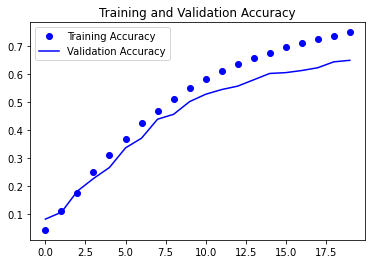

In [38]:
plt.plot(epoch, accuracy, 'bo', label='Training Accuracy')
plt.plot(epoch, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

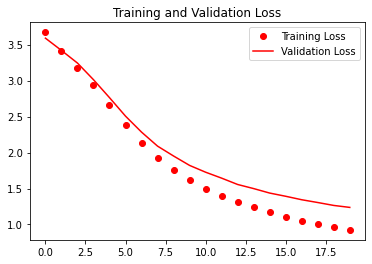

In [39]:
plt.plot(epoch, loss, 'ro', label='Training Loss')
plt.plot(epoch, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [42]:
predicted_classes = cnn_model.predict_classes(x_test_gray_norm)
y_true = y_test

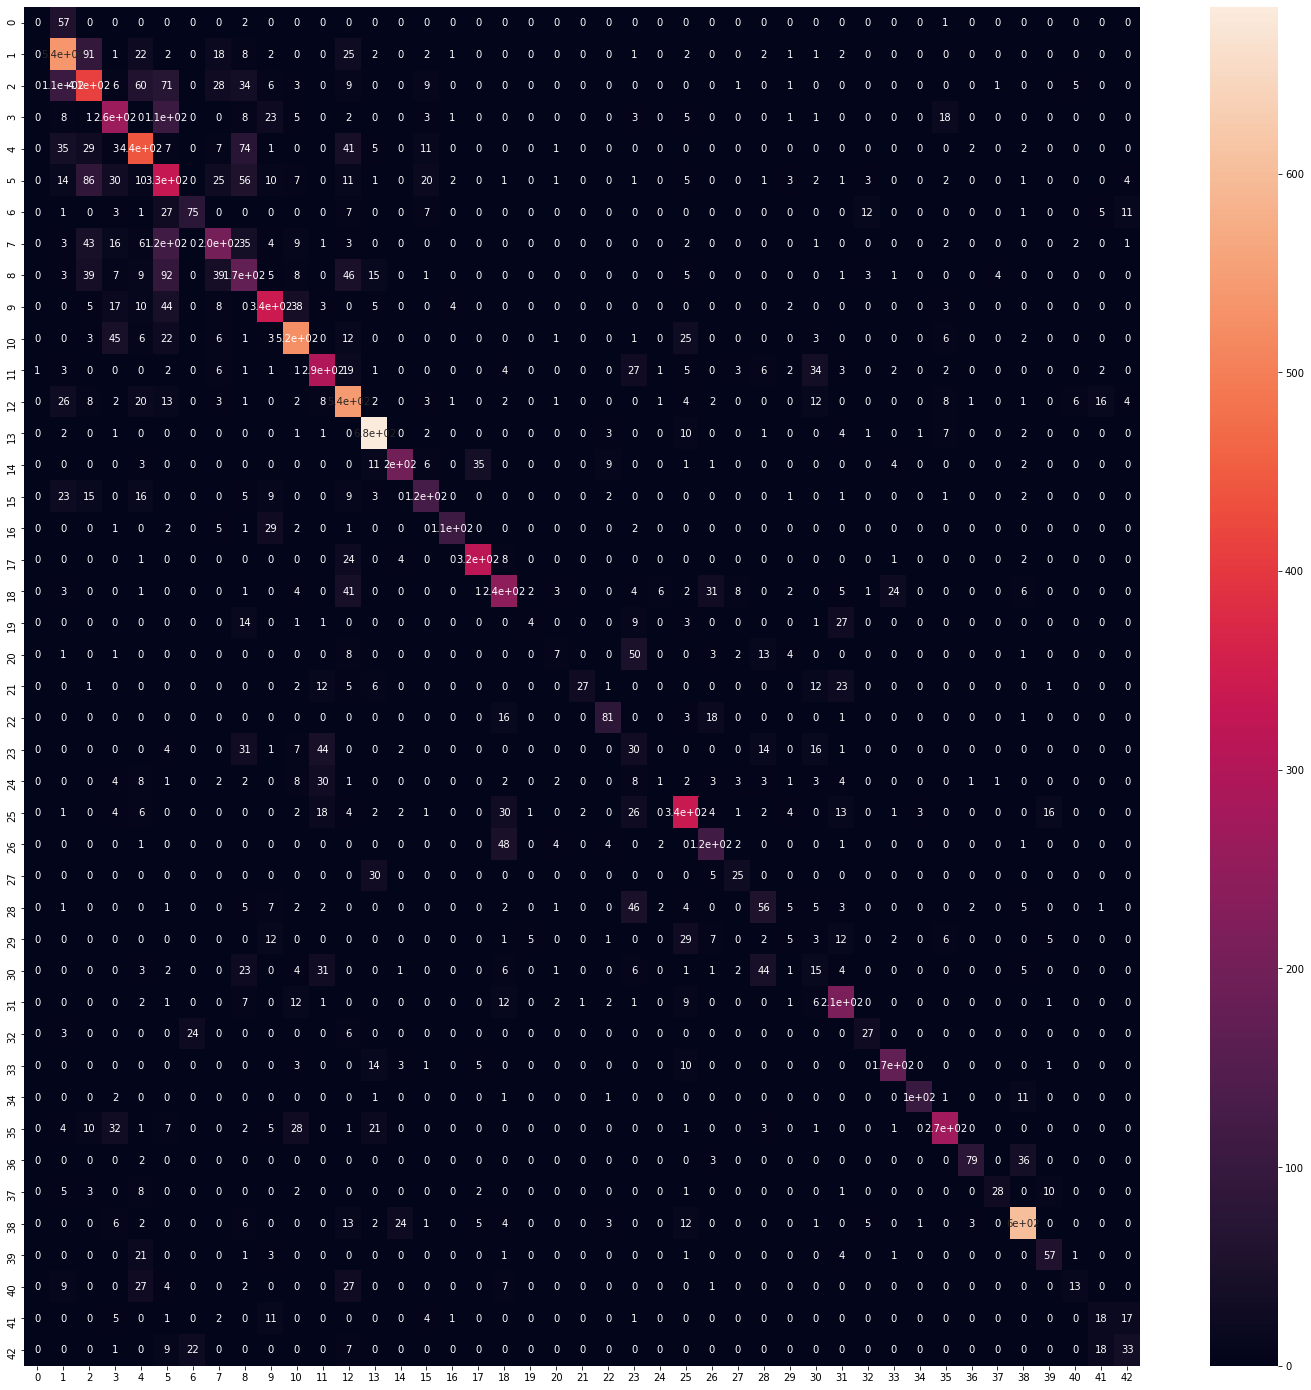

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

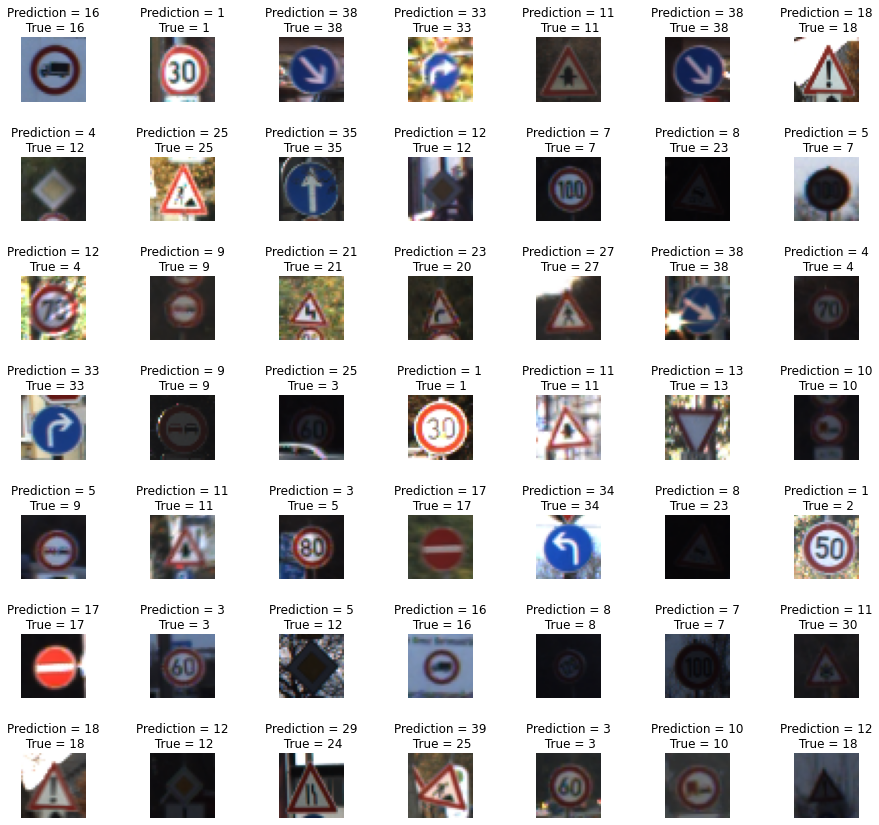

In [51]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (15,15))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes [i].imshow(x_test[i])
    axes[i].set_title("Prediction = {}\n True = {}".format(predicted_classes[i],y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)